### Atualizado em: 11/06/2020 18:20
### Fonte: https://covid.saude.gov.br/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
br = pd.read_excel('covid-br-11-jun-2020.xlsx')

In [3]:
br.shape

(186922, 16)

In [4]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186922 entries, 0 to 186921
Data columns (total 16 columns):
regiao                   186922 non-null object
estado                   186815 non-null object
municipio                183524 non-null object
coduf                    186922 non-null int64
codmun                   184379 non-null float64
codRegiaoSaude           183524 non-null float64
nomeRegiaoSaude          183524 non-null object
data                     186922 non-null datetime64[ns]
semanaEpi                186922 non-null int64
populacaoTCU2019         186067 non-null object
casosAcumulado           186922 non-null int64
casosNovos               186922 non-null int64
obitosAcumulado          186922 non-null int64
obitosNovos              186922 non-null int64
Recuperadosnovos         54 non-null float64
emAcompanhamentoNovos    54 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 22.8+ MB


In [5]:
br.loc[(br.estado == 'PB') & (br.municipio == 'Cuité')].shape

(31, 16)

In [7]:
br.loc[br.codmun == 250510].shape

(31, 16)

In [44]:
br.loc[br['estado'] == 'PB'].casosAcumulado.max()

25370

In [62]:
br.groupby('estado')['casosAcumulado'].max().sort_values(ascending=False)

estado
SP    162520
RJ     75775
CE     73879
PA     64126
MA     55680
AM     53989
PE     42994
BA     33891
PB     25370
ES     24229
DF     20507
AL     19200
MG     18448
AP     15166
RS     14168
RN     13234
SC     12953
SE     11056
RO     10547
AC      9091
PI      8823
PR      8457
GO      7657
RR      6594
TO      6529
MT      5092
MS      2853
Name: casosAcumulado, dtype: int64

Text(0.5, 1.0, 'COVID-19 | TOTAL DE CASOS POR UF')

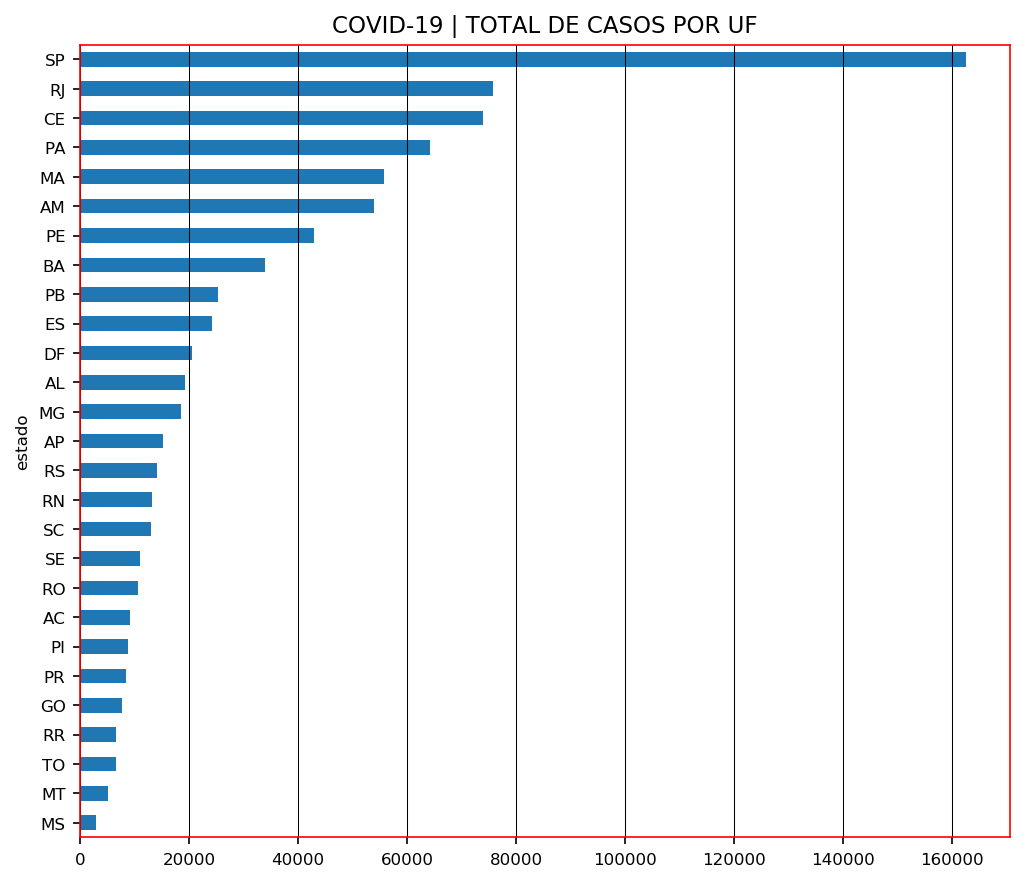

In [65]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 8
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.facecolor"] = '#FFFAFA'
plt.rcParams["axes.edgecolor"] = 'red'
plt.rcParams['figure.edgecolor'] = 'blue' #
plt.rcParams['figure.facecolor'] = 'w' #

br.groupby('estado')['casosAcumulado'].max().sort_values(ascending=True).plot.barh(figsize=(8,7))
plt.grid(axis='x',color='black', linestyle='-', linewidth=0.5)
plt.title('COVID-19 | TOTAL DE CASOS POR UF', fontsize=11)

In [10]:
br.loc[br['codRegiaoSaude'] == 25004.0][['municipio','codmun']].nunique().tolist()

[11, 11]

In [11]:
br.loc[br['codRegiaoSaude'] == 25004.0].groupby('municipio')['codmun'].unique()

municipio
Baraúna                  [250153.0]
Barra de Santa Rosa      [250160.0]
Cubati                   [250500.0]
Cuité                    [250510.0]
Damião                   [250535.0]
Nova Floresta            [251010.0]
Nova Palmeira            [251030.0]
Pedra Lavrada            [251110.0]
Picuí                    [251140.0]
Sossêgo                  [251615.0]
São Vicente do Seridó    [251540.0]
Name: codmun, dtype: object

## Paraíba

In [23]:
pb = br.loc[br['estado'] == 'PB']
pb.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
1046,Nordeste,PB,NaN,25,NaN,NaN,NaN,2020-03-19,12,4018127,1,1,0,0,NaN,NaN
1047,Nordeste,PB,NaN,25,NaN,NaN,NaN,2020-03-20,12,4018127,1,0,0,0,NaN,NaN
1048,Nordeste,PB,NaN,25,NaN,NaN,NaN,2020-03-21,12,4018127,1,0,0,0,NaN,NaN
1049,Nordeste,PB,NaN,25,NaN,NaN,NaN,2020-03-22,13,4018127,1,0,0,0,NaN,NaN
1050,Nordeste,PB,NaN,25,NaN,NaN,NaN,2020-03-23,13,4018127,2,1,0,0,NaN,NaN


## 4ª Região

In [12]:
cuite = br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Cuité') & (br['casosNovos'] > 0)]
picui = br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Picuí') & (br['casosNovos'] > 0)]
barauna = br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Baraúna') & (br['casosNovos'] > 0)]
barra = br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Barra de Santa Rosa') & (br['casosNovos'] > 0)]
cubati = br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Cubati') & (br['casosNovos'] > 0)]
sossego = br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Sossêgo') & (br['casosNovos'] > 0)]
saovicente = br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'São Vicente do Seridó') & (br['casosNovos'] > 0)]
pedra = br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Pedra Lavrada') & (br['casosNovos'] > 0)]
damiao = br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Damião') & (br['casosNovos'] > 0)]
floresta = br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Nova Floresta') & (br['casosNovos'] > 0)]
palmeira = br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Nova Palmeira') & (br['casosNovos'] > 0)]

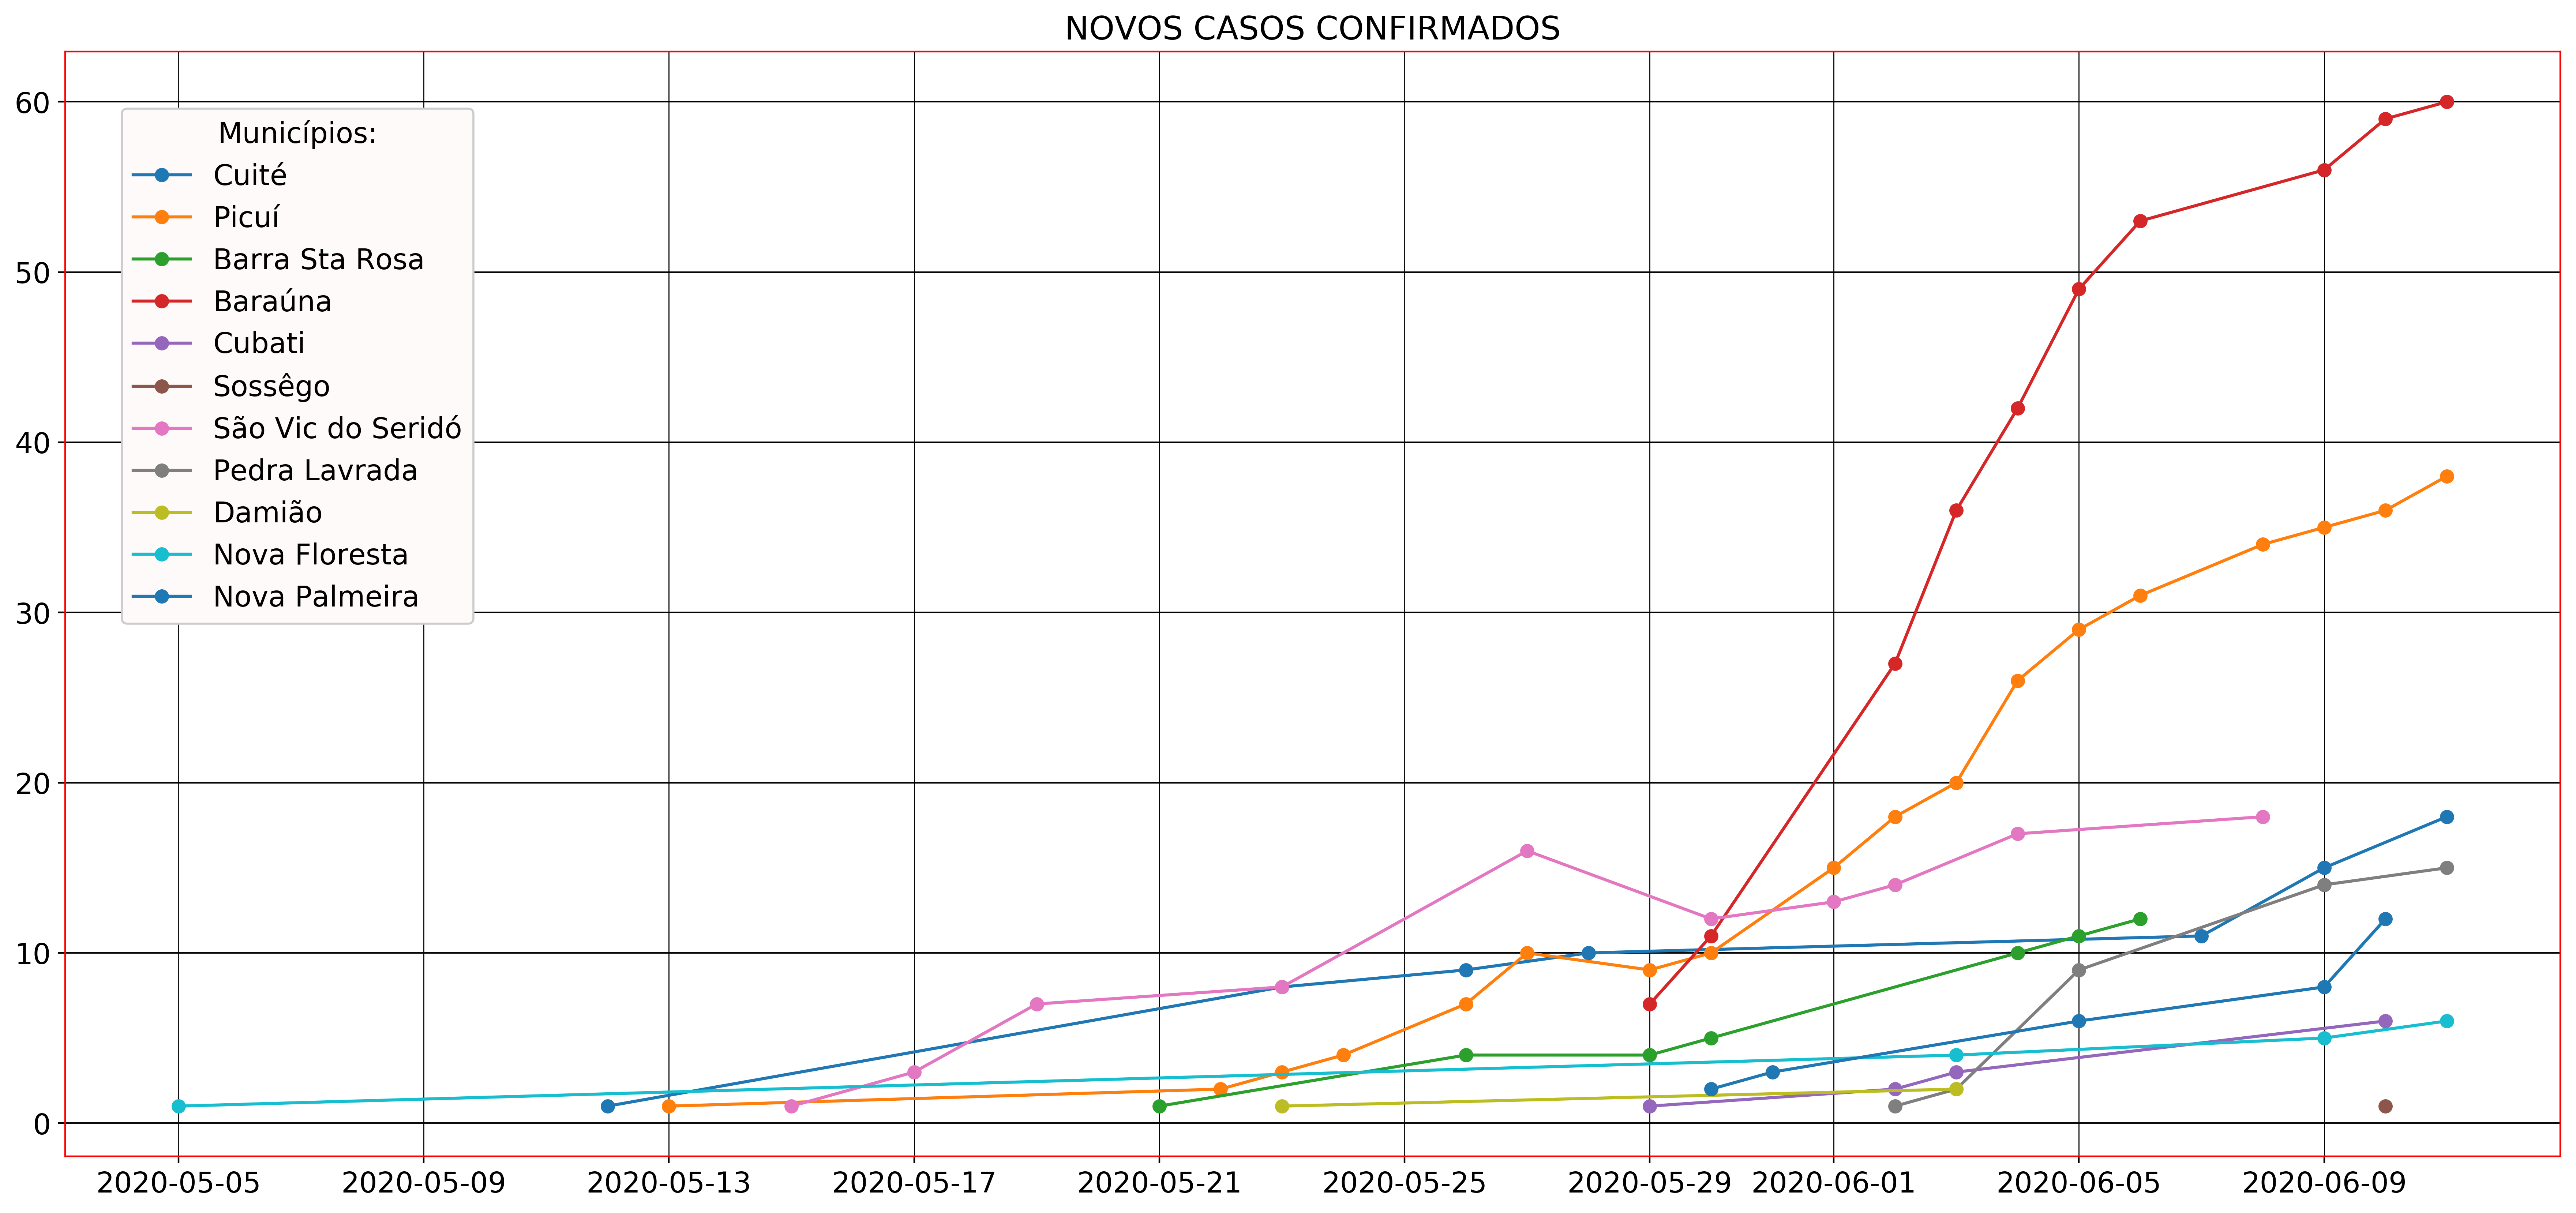

In [14]:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = 14
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.facecolor"] = '#FFFAFA'
plt.rcParams["axes.edgecolor"] = 'red'
plt.rcParams['figure.edgecolor'] = 'blue' #
plt.rcParams['figure.facecolor'] = 'w' #


colors = ['C9', 'C1', 'C2']
fig = plt.figure(figsize=(22,10))
ax1 = plt.subplot(111)
ax1.plot(cuite.data, cuite.casosAcumulado, 'o-')
ax1.plot(picui.data, picui.casosAcumulado, 'o-')
ax1.plot(barra.data, barra.casosAcumulado, 'o-')
ax1.plot(barauna.data, barauna.casosAcumulado, 'o-')
ax1.plot(cubati.data, cubati.casosAcumulado, 'o-')
ax1.plot(sossego.data, sossego.casosAcumulado, 'o-')
ax1.plot(saovicente.data, saovicente.casosAcumulado, 'o-')
ax1.plot(pedra.data, pedra.casosAcumulado, 'o-')
ax1.plot(damiao.data, damiao.casosAcumulado, 'o-')
ax1.plot(floresta.data, floresta.casosAcumulado, 'o-')
ax1.plot(palmeira.data, palmeira.casosAcumulado, 'o-')

ax1.legend(['Cuité', 'Picuí', 'Barra Sta Rosa', 'Baraúna', 'Cubati', 'Sossêgo', 'São Vic do Seridó',
            'Pedra Lavrada', 'Damião', 'Nova Floresta', 'Nova Palmeira'], fontsize=14,
           title='Municípios:', borderaxespad=2)

plt.title('NOVOS CASOS CONFIRMADOS', fontsize=16)

plt.grid(axis='x',color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='y',color='black', linestyle='-', linewidth=0.7)

plt.show()

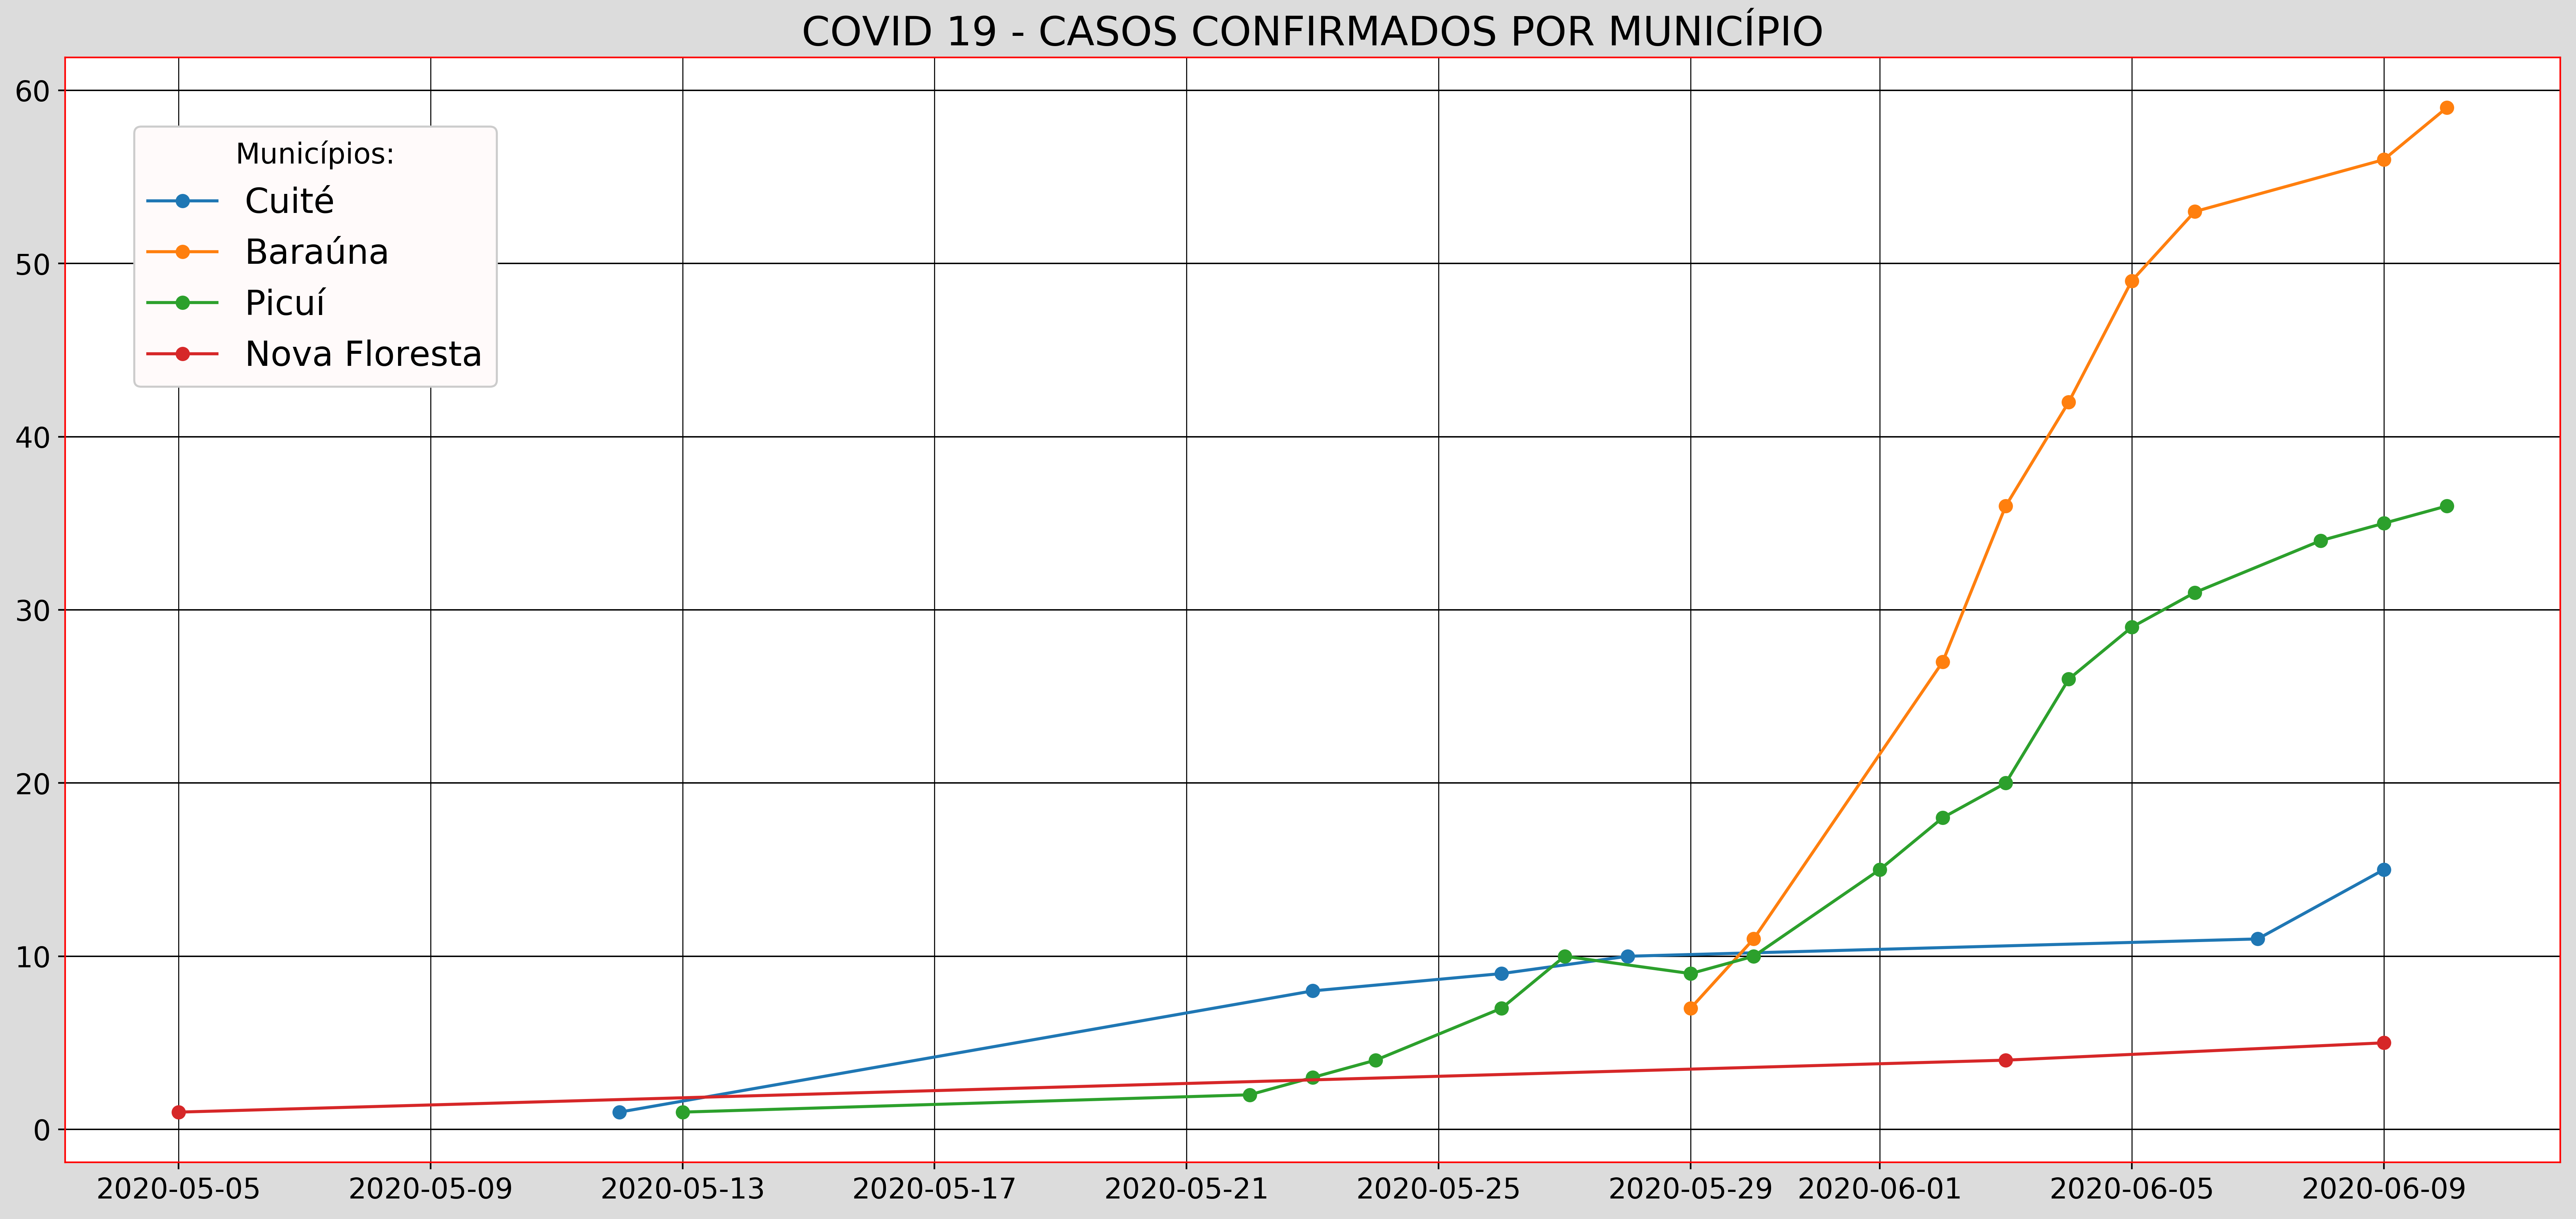

In [209]:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = 14
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.facecolor"] = '#FFFAFA'
plt.rcParams["axes.edgecolor"] = 'red'
plt.rcParams['figure.edgecolor'] = 'blue' #
plt.rcParams['figure.facecolor'] = '#DCDCDC' #


colors = ['C9', 'C1', 'C2']
fig = plt.figure(figsize=(22,10))
ax1 = plt.subplot(111)
ax1.plot(cuite.data, cuite.casosAcumulado, 'o-')
ax1.plot(barauna.data, barauna.casosAcumulado, 'o-')
ax1.plot(picui.data, picui.casosAcumulado, 'o-')
ax1.plot(floresta.data, floresta.casosAcumulado, 'o-')


ax1.legend(['Cuité','Baraúna','Picuí', 'Nova Floresta'], fontsize=17,
           title='Municípios:', borderaxespad=2)

plt.title('COVID 19 - CASOS CONFIRMADOS POR MUNICÍPIO', fontsize=20)

plt.grid(axis='x',color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='y',color='black', linestyle='-', linewidth=0.7)

plt.show()

In [212]:
reg.casosNovos.sum()

121

In [28]:
cuite

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
52924,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-12,20,20338,1,1,0,0,NaN,NaN
52935,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-23,21,20338,8,7,0,0,NaN,NaN
52938,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-26,22,20338,9,1,0,0,NaN,NaN
52940,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-28,22,20338,10,1,0,0,NaN,NaN
52950,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-06-07,24,20338,11,1,1,0,NaN,NaN
52952,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-06-09,24,20338,15,5,1,0,NaN,NaN
52954,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-06-11,24,20338,18,3,1,0,NaN,NaN


In [17]:
br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Cuité') & (br['casosNovos'] > 0)]['casosNovos'].sum()

19

In [19]:
br.loc[(br['codRegiaoSaude'] == 25004.0) & (br['municipio'] == 'Cuité') & (br['casosNovos'] > 0)]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
52924,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-12,20,20338,1,1,0,0,NaN,NaN
52935,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-23,21,20338,8,7,0,0,NaN,NaN
52938,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-26,22,20338,9,1,0,0,NaN,NaN
52940,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-28,22,20338,10,1,0,0,NaN,NaN
52950,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-06-07,24,20338,11,1,1,0,NaN,NaN
52952,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-06-09,24,20338,15,5,1,0,NaN,NaN
52954,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-06-11,24,20338,18,3,1,0,NaN,NaN


In [49]:
reg.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
50213,Nordeste,PB,Barra de Santa Rosa,25,250160.0,25004.0,4ª Região,2020-05-21,21,15384,1,1,0,0,NaN,NaN
50214,Nordeste,PB,Barra de Santa Rosa,25,250160.0,25004.0,4ª Região,2020-05-22,21,15384,1,0,0,0,NaN,NaN
50215,Nordeste,PB,Barra de Santa Rosa,25,250160.0,25004.0,4ª Região,2020-05-23,21,15384,1,0,0,0,NaN,NaN
50216,Nordeste,PB,Barra de Santa Rosa,25,250160.0,25004.0,4ª Região,2020-05-24,22,15384,1,0,0,0,NaN,NaN
50217,Nordeste,PB,Barra de Santa Rosa,25,250160.0,25004.0,4ª Região,2020-05-25,22,15384,1,0,0,0,NaN,NaN


In [20]:
reg = pb.loc[(pb['municipio'] == 'Cuité') | (pb['municipio'] == 'Barra de Santa Rosa') | (pb['municipio'] == 'Nova Floresta') |
       (pb['municipio'] == 'Picuí') | (pb['municipio'] == 'Damião') | (pb['municipio'] == 'São Vicente do Seridó') |
       (pb['municipio'] == 'Sossêgo') | (pb['municipio'] == 'Baraúna') | (pb['municipio'] == 'Nova Palmeira') |
       (pb['municipio'] == 'Pedra Lavrada') | (pb['municipio'] == 'Frei Martinho') | (pb['municipio'] == 'Cubati')]

In [25]:
reg.groupby('municipio')['casosNovos'].sum().sort_values(ascending=False)

municipio
Baraúna                  60
Picuí                    38
São Vicente do Seridó    18
Cuité                    18
Pedra Lavrada            15
Nova Palmeira            12
Barra de Santa Rosa      12
Nova Floresta             6
Cubati                    6
Damião                    2
Sossêgo                   1
Name: casosNovos, dtype: int64

municipio
Baraúna                  60
Picuí                    38
São Vicente do Seridó    18
Cuité                    18
Pedra Lavrada            15
Nova Palmeira            12
Barra de Santa Rosa      12
Nova Floresta             6
Cubati                    6
Damião                    2
Sossêgo                   1
Name: casosNovos, dtype: int64


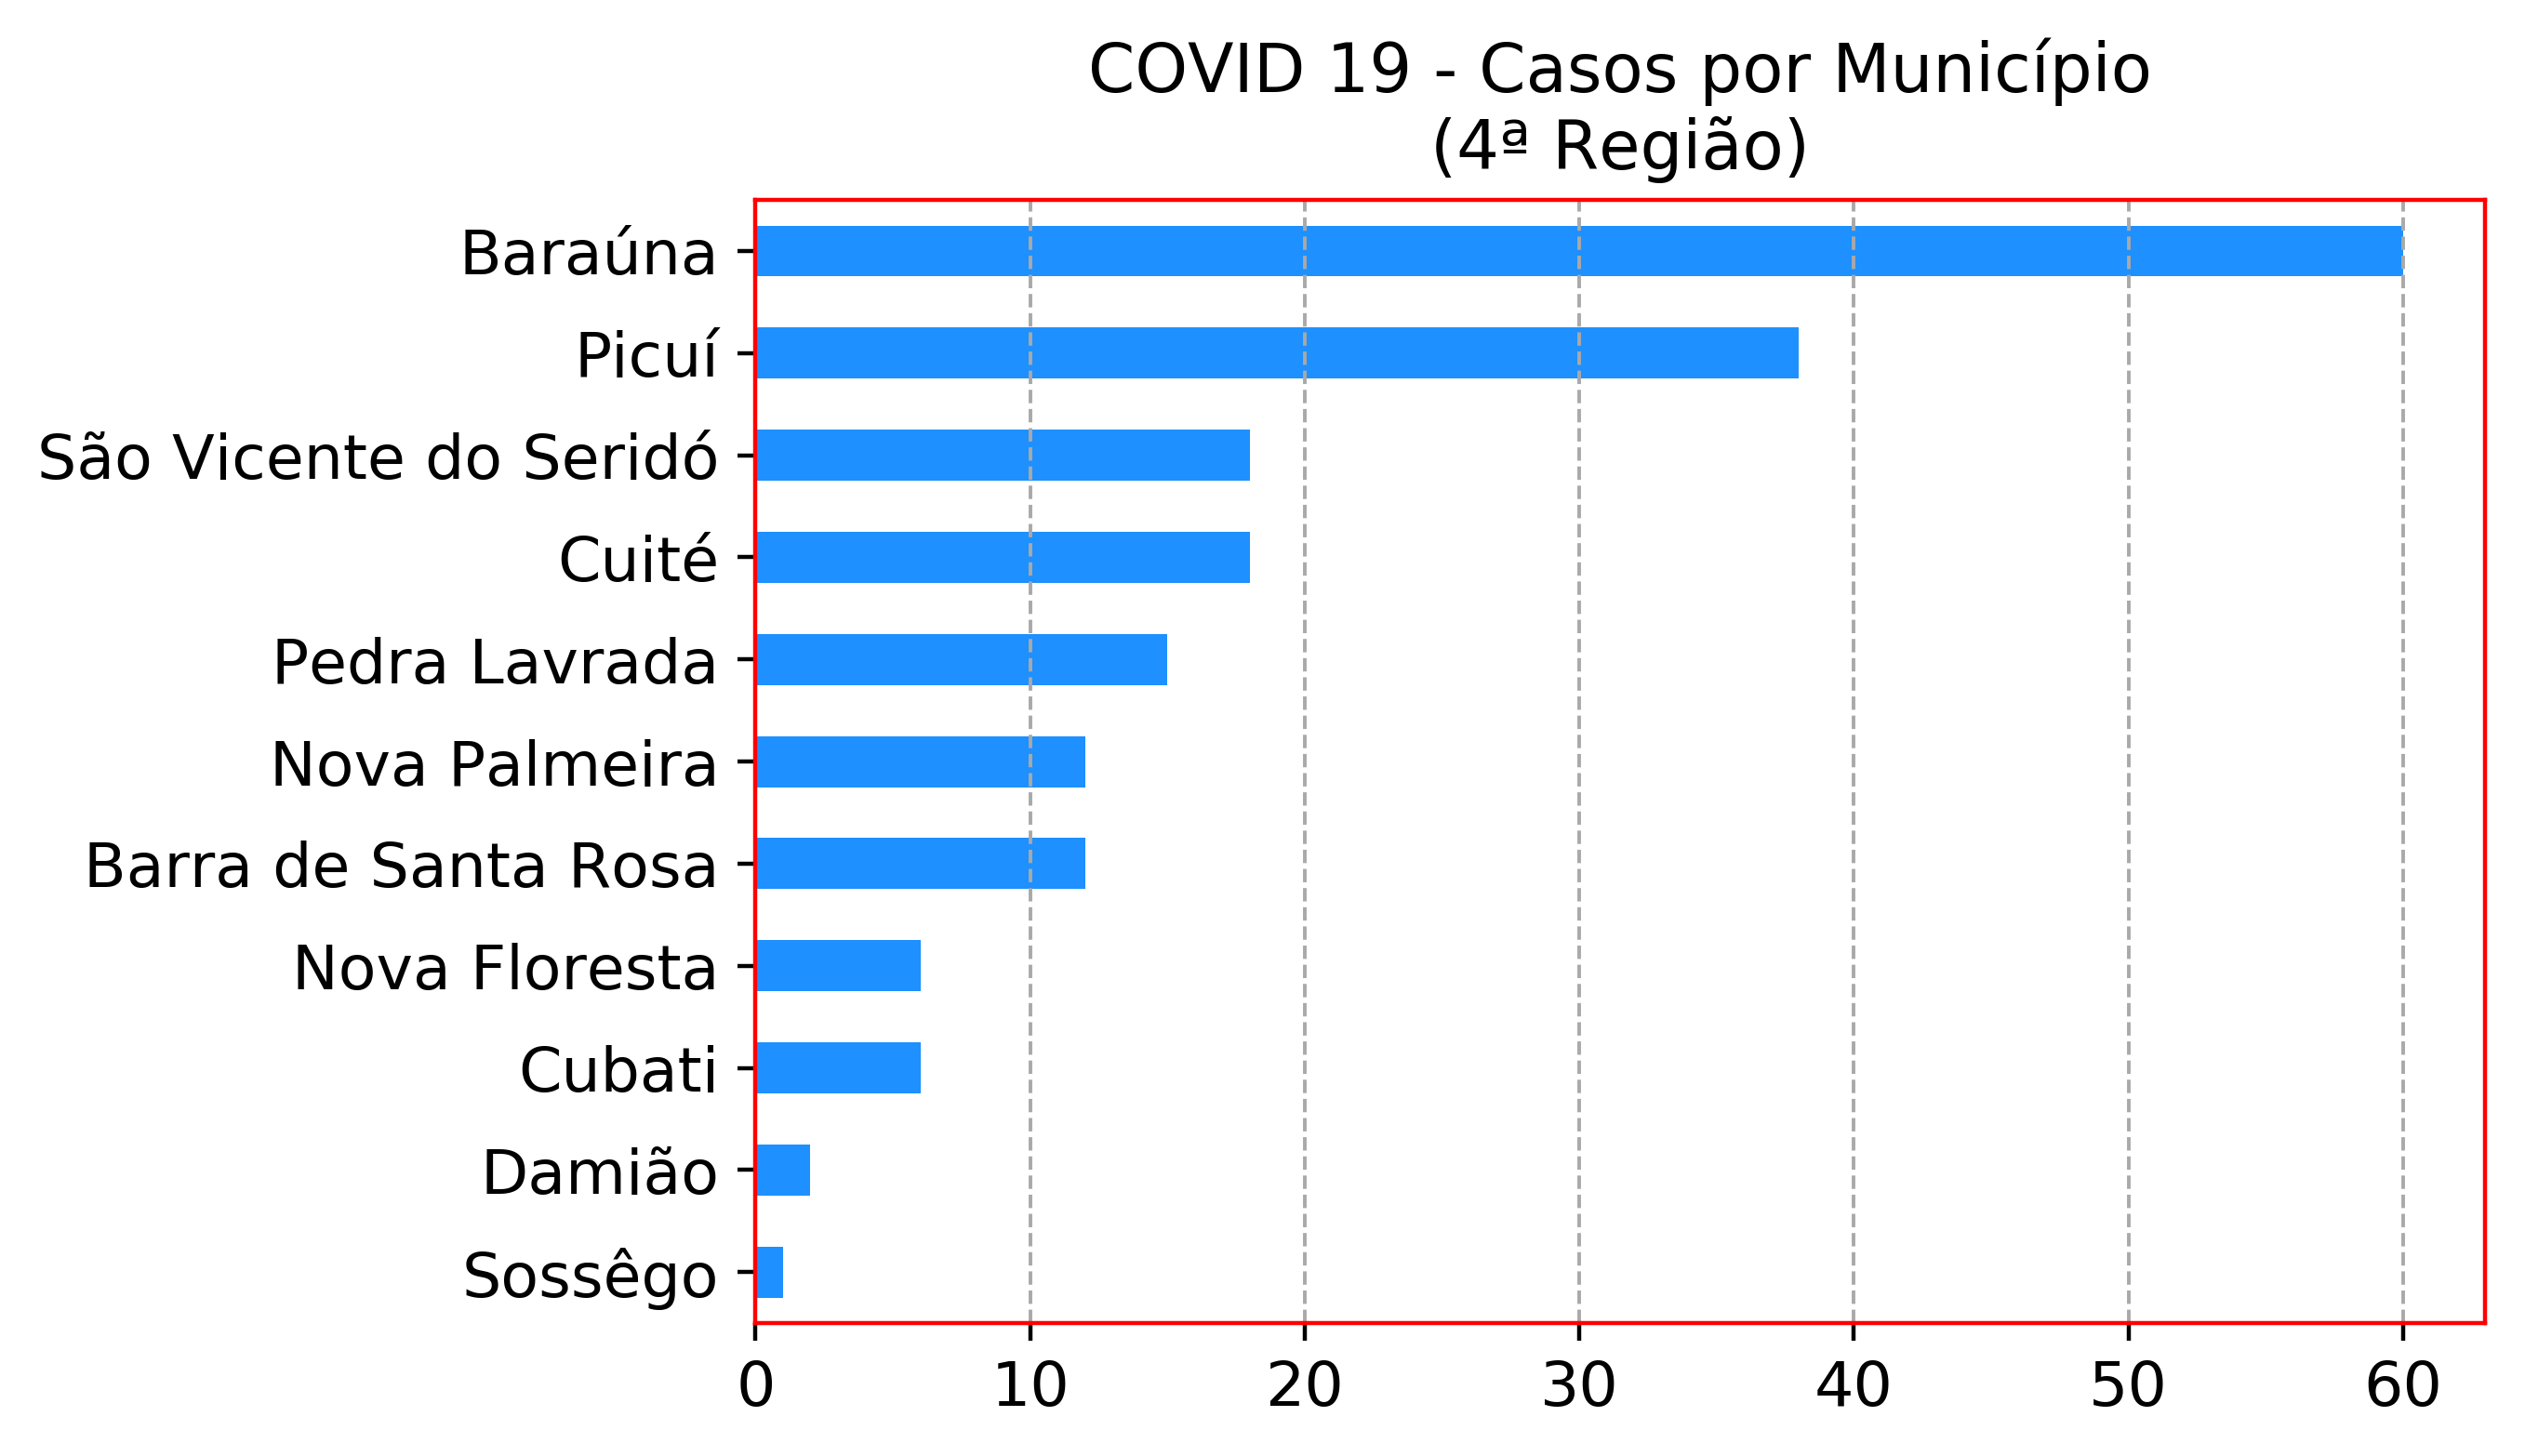

In [35]:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = 12
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.facecolor"] = '#FFFAFA'
plt.rcParams["axes.edgecolor"] = 'red'
plt.rcParams['figure.edgecolor'] = 'blue' #
plt.rcParams['figure.facecolor'] = 'w'

reg.groupby('municipio')['casosNovos'].sum().sort_values().plot.barh(color='#1e90ff')

plt.title('COVID 19 - Casos por Município\n(4ª Região)', fontsize=13)
plt.grid(axis='x', color='#a9a9a9', linestyle='--', linewidth=0.7)
plt.ylabel(None);
print(reg.groupby('municipio')['casosNovos'].sum().sort_values(ascending=False));

In [27]:
reg.groupby('municipio')['codmun'].value_counts()

municipio              codmun  
Baraúna                250153.0    14
Barra de Santa Rosa    250160.0    22
Cubati                 250500.0    14
Cuité                  250510.0    31
Damião                 250535.0    20
Nova Floresta          251010.0    38
Nova Palmeira          251030.0    13
Pedra Lavrada          251110.0    10
Picuí                  251140.0    30
Sossêgo                251615.0     2
São Vicente do Seridó  251540.0    28
Name: codmun, dtype: int64

In [51]:
reg.to_excel('covid-reg.xlsx')

In [ ]:
pb = br.loc[(br['estado'] == 'PB')]

In [16]:
pb = br.loc[(br['estado'] == 'PB')]
mes.groupby(dados.data.dt.month)['violacao'].count()

In [21]:
pb.loc[br['municipio'] == 'Cuité'].casosNovos.sum()

15

In [23]:
pb.loc[br['municipio'] == 'Cuité'].casosAcumulado.sum()

204

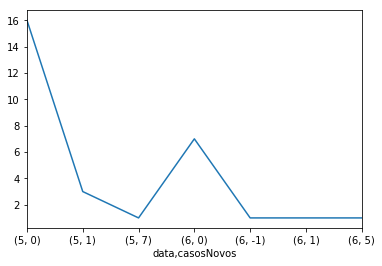

In [34]:
pb.loc[br['municipio'] == 'Cuité'].groupby(pb.data.dt.month)['casosNovos'].value_counts().plot()

In [24]:
pb.loc[br['municipio'] == 'Cuité']

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
51690,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-12,20,20338,1,1,0,0,NaN,NaN
51691,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-13,20,20338,1,0,0,0,NaN,NaN
51692,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-14,20,20338,1,0,0,0,NaN,NaN
51693,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-15,20,20338,1,0,0,0,NaN,NaN
51694,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-16,20,20338,1,0,0,0,NaN,NaN
51695,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-17,21,20338,1,0,0,0,NaN,NaN
51696,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-18,21,20338,1,0,0,0,NaN,NaN
51697,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-19,21,20338,1,0,0,0,NaN,NaN
51698,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-20,21,20338,1,0,0,0,NaN,NaN
51699,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-21,21,20338,1,0,0,0,NaN,NaN


In [20]:
pb.loc[(br['municipio'] == 'Cuité') | (br['municipio'] == 'Picuí')]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
51690,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-12,20,20338,1,1,0,0,NaN,NaN
51691,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-13,20,20338,1,0,0,0,NaN,NaN
51692,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-14,20,20338,1,0,0,0,NaN,NaN
51693,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-15,20,20338,1,0,0,0,NaN,NaN
51694,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-16,20,20338,1,0,0,0,NaN,NaN
51695,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-17,21,20338,1,0,0,0,NaN,NaN
51696,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-18,21,20338,1,0,0,0,NaN,NaN
51697,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-19,21,20338,1,0,0,0,NaN,NaN
51698,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-20,21,20338,1,0,0,0,NaN,NaN
51699,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-21,21,20338,1,0,0,0,NaN,NaN


In [31]:
ct = br.loc[br['codmun'] == 250510.0]

In [32]:
ct.casosNovos.sum()

18

In [33]:
ct

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
52924,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-12,20,20338,1,1,0,0,NaN,NaN
52925,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-13,20,20338,1,0,0,0,NaN,NaN
52926,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-14,20,20338,1,0,0,0,NaN,NaN
52927,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-15,20,20338,1,0,0,0,NaN,NaN
52928,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-16,20,20338,1,0,0,0,NaN,NaN
52929,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-17,21,20338,1,0,0,0,NaN,NaN
52930,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-18,21,20338,1,0,0,0,NaN,NaN
52931,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-19,21,20338,1,0,0,0,NaN,NaN
52932,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-20,21,20338,1,0,0,0,NaN,NaN
52933,Nordeste,PB,Cuité,25,250510.0,25004.0,4ª Região,2020-05-21,21,20338,1,0,0,0,NaN,NaN
